T = 20.524184785591203


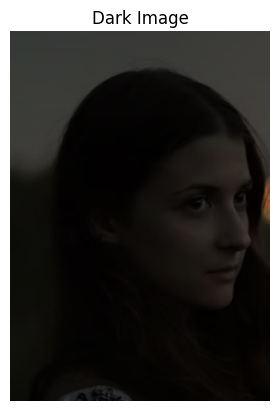

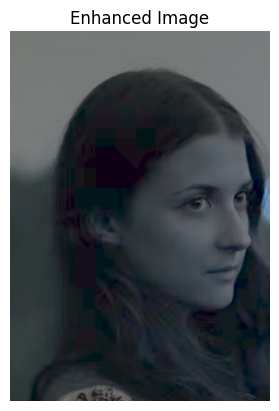

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_augmentation(image, T1=50, T2=100, gamma_low=0.5, gamma_mid=0.8):
    """
    Thuật toán tăng cường dữ liệu thích ứng cho ảnh ánh sáng yếu.
    - image: Ảnh đầu vào (RGB).
    - T1, T2: Ngưỡng độ sáng trung bình.
    - gamma_low, gamma_mid: Giá trị gamma cho ảnh rất tối và tối vừa.
    Returns:
    - Ảnh sau khi tăng cường.
    """
    # Chuyển sang grayscale để phân tích độ sáng
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Tính độ sáng trung bình
    mean_intensity = np.mean(gray)
    print("T =", mean_intensity)
    # Xác định kỹ thuật tăng cường dựa trên độ sáng
    if mean_intensity < T1:
        # Ảnh rất tối: Áp dụng gamma correction mạnh
        gamma = gamma_low
        image = gamma_correction(image, gamma)
    elif T1 <= mean_intensity < T2:
        # Ảnh tối vừa: Áp dụng gamma correction nhẹ hoặc histogram equalization
        gamma = gamma_mid
        image = gamma_correction(image, gamma)
        # Nếu cần, có thể thêm histogram equalization
        # image = histogram_equalization(image)
    else:
        # Ảnh sáng đủ: Chỉ áp dụng contrast stretching nhẹ
        image = contrast_stretching(image)
    
    return image

def gamma_correction(image, gamma):
    """Áp dụng gamma correction để làm ảnh sáng hơn nếu gamma < 1."""
    table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

def histogram_equalization(image):
    """Áp dụng histogram equalization."""
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def contrast_stretching(image):
    """Áp dụng contrast stretching."""
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * 255.0 / (max_val - min_val + 1e-6)
    return stretched.astype(np.uint8)

# Ví dụ sử dụng
if __name__ == "__main__":
    # Đọc ảnh
    img = cv2.imread("dark_image.png")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Áp dụng thuật toán
    enhanced_img = adaptive_augmentation(img_rgb)
    enhanced_img_rgb = cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB)

    # Hiển thị ảnh gốc
    plt.imshow(img_rgb)
    plt.title("Dark Image")  # Thêm tiêu đề cho ảnh gốc
    plt.axis('off')  # Tắt trục
    plt.show()

    # Hiển thị ảnh đã được tăng cường
    plt.imshow(enhanced_img_rgb)
    plt.title("Enhanced Image")  # Thêm tiêu đề cho ảnh đã tăng cường
    plt.axis('off')  # Tắt trục
    plt.show()
    # Lưu hoặc hiển thị kết quả
    cv2.imwrite("enhanced_image.jpg", cv2.cvtColor(enhanced_img, cv2.COLOR_RGB2BGR))